<a href="https://colab.research.google.com/github/abkerper/project_gss/blob/main/Annika_Religion_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [2]:
df = pd.read_csv("./selected_gss_data.csv", low_memory = False)

In [5]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns
df1 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet', engine='pyarrow')
df2 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet', engine='pyarrow')
df3 = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet', engine='pyarrow')

In [6]:
df1['relig']

0            jewish
1          catholic
2        protestant
3             other
4        protestant
            ...    
24125    protestant
24126          none
24127    protestant
24128    protestant
24129    protestant
Name: relig, Length: 24130, dtype: category
Categories (26, object): ['protestant', 'catholic', 'jewish', 'none', ..., 'uncodeable',
                          'not available in this release', 'not available in this year', 'see codebook']

In [7]:
df = pd.concat([df1, df2 ,df3], ignore_index = True )
#df = df.loc[:,['polviews','age','relig','cappun'] ]
df.head()


,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,agehef12,agehef13,agehef14,hompoph,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtsscomp,wtsscompnr
0,1972,1,working full time,NaN,NaN,NaN,205.0,50.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4446,NaN
1,1972,2,retired,NaN,NaN,yes,441.0,45.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN
2,1972,3,working part time,NaN,NaN,NaN,270.0,44.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN
3,1972,4,working full time,NaN,NaN,NaN,1.0,57.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN
4,1972,5,keeping house,NaN,NaN,yes,385.0,40.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN


In [8]:
cappun = df['cappun']
cappun = cappun.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)

polviews = df['polviews']
polviews = polviews.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)

relig = df['relig']
relig = relig.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)


In [9]:
df['cappun'].value_counts()

favor                            42181
oppose                           18666
don't know                           0
iap                                  0
I don't have a job                   0
dk, na, iap                          0
no answer                            0
not imputable_(2147483637)           0
not imputable_(2147483638)           0
refused                              0
skipped on web                       0
uncodeable                           0
not available in this release        0
not available in this year           0
see codebook                         0
Name: cappun, dtype: int64

In [11]:
cappun = df['cappun']
cappun = cappun.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)
cappun.value_counts()

favor     42181
oppose    18666
Name: cappun, dtype: int64

<Axes: xlabel='polviews', ylabel='Count'>

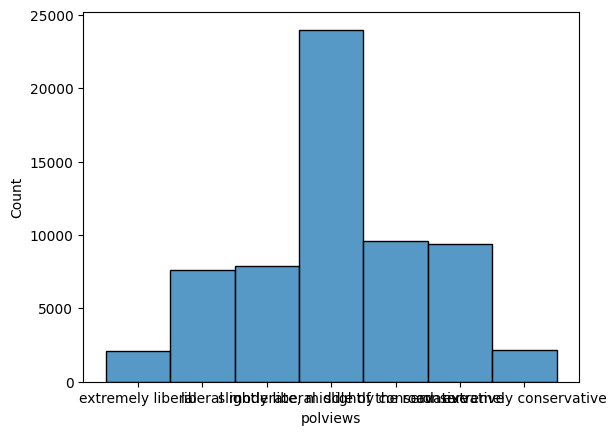

In [12]:

sns.histplot(data=df,x='polviews')

<Axes: xlabel='cappun', ylabel='Count'>

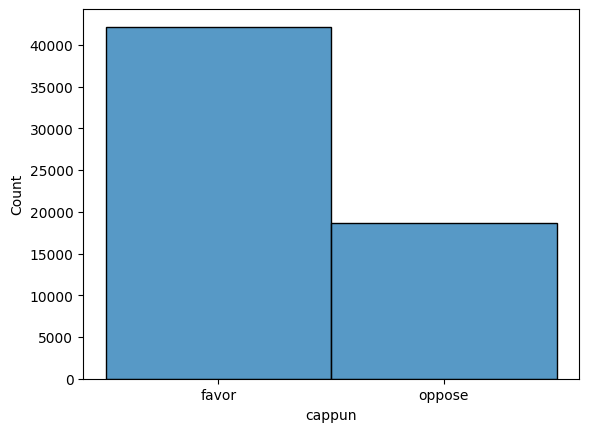

In [13]:
sns.histplot(data=df,x='cappun')

In [17]:
polviews = df['polviews']
polviews = polviews.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)
polviews.value_counts()

moderate, middle of the road    23992
slightly conservative            9596
conservative                     9361
slightly liberal                 7900
liberal                          7623
extremely conservative           2165
extremely liberal                2081
Name: polviews, dtype: int64

In [18]:
df.loc[:,['polviews','cappun']].groupby(['polviews']).describe()

cappun                      
                               count unique     top   freq
polviews                                                  
extremely liberal               1956      2  oppose   1136
liberal                         7022      2   favor   3661
slightly liberal                7311      2   favor   4551
moderate, middle of the road   21884      2   favor  15752
slightly conservative           8914      2   favor   6789
conservative                    8701      2   favor   6968
extremely conservative          2021      2   favor   1598
don't know                         0      0     NaN    NaN
iap                                0      0     NaN    NaN
I don't have a job                 0      0     NaN    NaN
dk, na, iap                        0      0     NaN    NaN
no answer                          0      0     NaN    NaN
not imputable_(2147483637)         0      0     NaN    NaN
not imputable_(2147483638)         0      0     NaN    NaN
refused                            0      0     NaN    NaN
skipped on web                     0      0     NaN    NaN
uncodeable                         0      0     NaN    NaN
not available in this release      0      0     NaN    NaN
not available in this year         0      0     NaN    NaN
see codebook                       0      0     NaN    NaN